# Challenge - Global warming data analysis

![global warming](https://th.bing.com/th/id/R.59a9ab47b7b9a1e50fb75b124c9b3c9f?rik=qBHpxbnGeuMNUA&pid=ImgRaw&r=0)

### Description

After looking through each library, it's now time to apply our skills in our first EDA.

In this case study, we will analyze the global land temperature data in the countries with a goal to find any underlying relationships between the change in temperature and the geographical location.

In addition, we should analyze the dataset as a whole: extracting statistical parameters, preprocessing the data and doing a bit of visualization.

### Data

For this task, we will be using the [Climate Change: Earth Surface Temperature dataset](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv) which combines 1.6 billion temperature reports from 16 pre-existing archives (starting from 1750s). 




### Tasks

1. Read and preprocess data (missing values, outliers, etc.)
2. Find and visualize the 20 countries with the highest mean temperature
3. Which countries had the largest change in temperature?
4. What is the overall tendency?

### Reading and describing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 

In [2]:
#---------------------------------TODO------------------------------------#
#Reading the data from a path

#Have a look of what the data is comprised of
df = pd.read_csv('archive\GlobalLandTemperaturesByCountry.csv',sep=',')
df.index=df['dt']
df=df.drop('dt',axis=1)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [3]:
#Brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AverageTemperature             544811 non-null  float64
 1   AverageTemperatureUncertainty  545550 non-null  float64
 2   Country                        577462 non-null  object 
dtypes: float64(2), object(1)
memory usage: 17.6+ MB


In [4]:
#Find the number of countries
df['Country'].nunique()

243

In [5]:
df['Country'].nunique()

243

### Preprocessing

As it can already be seen from the first glances at data, it contains a lot of NaN values which cannot be used for further analysis. Therefore, we need to remove these values from our dataset.

In [7]:
# Check the number of missing values
df.isna().sum()

AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [8]:
# Function that deals with missing values
df.dropna(axis=0)
df1=df.dropna(axis=0)

In [9]:
#Check if everything went correctly
df1.isna().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [10]:
df1.head(50)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1744-04-01,1.530,4.680,Åland
1744-05-01,6.702,1.789,Åland
1744-06-01,11.609,1.577,Åland
1744-07-01,15.342,1.410,Åland
1744-09-01,11.702,1.517,Åland
1744-10-01,5.477,1.862,Åland
1744-11-01,3.407,1.425,Åland
1744-12-01,-2.181,1.641,Åland


### Visualizing data

Prior to completing the intended analysis, it also might be useful to explore the data in further.

In [11]:
df2=df1.groupby(['Country']).mean()
df_mean=df2.sort_values(['AverageTemperature'],ascending=False).head(20)
df_mean

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Djibouti,28.816603,0.885405
Mali,28.441977,0.774745
Burkina Faso,28.083507,0.697686
Senegal,27.967375,0.710496
Aruba,27.920390,0.645268
United Arab Emirates,27.693995,0.811213
Mauritania,27.620256,0.850918
Gambia,27.538552,0.725150
Niger,27.458973,0.865224


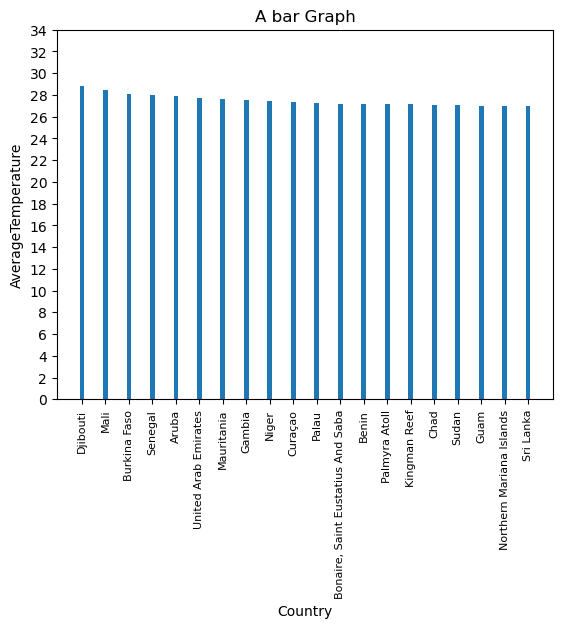

In [12]:
#Plotting bar graph
plt.bar(df_mean.index, df_mean['AverageTemperature'],width=0.2)

plt.xlabel('Country')
plt.ylabel('AverageTemperature')
plt.title('A bar Graph')
plt.yticks(np.arange(0, 35, 2))
plt.xticks(rotation = 90, fontsize = 8)

plt.show()

### Largest Temperature Change

After performing the preprocessing and general data characterization, we can now find the countries that underwent the largest temperature change. There are numerous ways in which such task can be completed - the guided way is only a suggestion.

In [13]:
# Extracting the names of countries from the dataset
df3 = df1.groupby(['Country']).mean()
df3.index 
names = list()
for i in df3.index:
    names.append(i)
names

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua And Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Baker Island',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic Of The)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte D'Ivoire",
 'Denmark',
 'Denmark (Europe)',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Est

In [17]:
df1[df1['Country']== 'Mali']['AverageTemperature'][0]
def temperature_Change(a):
    values = list()
    for i in a:
        temp_delta= (df1[df1['Country']==i]['AverageTemperature'][-1]) - (df1[df1['Country']==i]['AverageTemperature'][0])
        values.append(round(temp_delta,2))
    return values 


In [18]:
temp = temperature_Change(names)
temp

[13.02,
 6.15,
 16.17,
 19.91,
 0.35,
 13.24,
 0.66,
 4.22,
 4.12,
 -1.6,
 8.18,
 3.86,
 13.71,
 3.63,
 14.83,
 11.24,
 6.44,
 18.88,
 0.13,
 10.63,
 3.13,
 17.46,
 11.38,
 5.13,
 -1.51,
 9.54,
 -0.82,
 3.84,
 16.42,
 -6.48,
 -0.2,
 4.2,
 17.62,
 1.66,
 3.14,
 2.95,
 2.62,
 -0.19,
 2.66,
 5.21,
 5.75,
 0.22,
 6.36,
 -1.19,
 3.29,
 -0.36,
 0.38,
 -3.7,
 -0.58,
 1.88,
 1.51,
 16.34,
 6.04,
 3.64,
 8.26,
 14.49,
 -0.76,
 25.66,
 11.02,
 10.78,
 3.66,
 3.99,
 0.34,
 17.41,
 2.64,
 -1.6,
 7.29,
 16.93,
 3.89,
 15.05,
 -6.02,
 5.3,
 1.66,
 -1.91,
 18.68,
 10.16,
 12.07,
 2.06,
 0.26,
 -4.27,
 -1.51,
 2.53,
 6.77,
 14.74,
 12.76,
 -1.67,
 15.78,
 25.7,
 2.79,
 4.0,
 1.79,
 4.45,
 6.95,
 0.39,
 1.03,
 1.35,
 3.59,
 -2.96,
 3.58,
 12.61,
 17.36,
 10.01,
 9.51,
 0.05,
 22.51,
 27.58,
 7.44,
 5.76,
 6.57,
 14.07,
 3.43,
 26.77,
 6.95,
 8.17,
 35.81,
 0.44,
 2.78,
 2.97,
 24.57,
 30.08,
 5.05,
 16.69,
 7.23,
 -8.13,
 -0.49,
 3.44,
 13.51,
 15.89,
 11.87,
 13.26,
 18.15,
 -5.59,
 -1.32,
 1.4,
 9.29

In [30]:
# Converting to dataframe and sorting in descending order
data3 = pd.DataFrame(data=temp,index=names,columns=['TemperatureChange'])
data4 = data3.sort_values(by=['TemperatureChange'],ascending= False)[:20]
data4

,TemperatureChange
Russia,40.93
Kazakhstan,35.81
North Korea,34.03
Uzbekistan,31.33
South Korea,31.28
Kyrgyzstan,30.08
Turkmenistan,29.73
Iraq,27.58
Japan,26.77
Tajikistan,26.33


<function matplotlib.pyplot.show(close=None, block=None)>

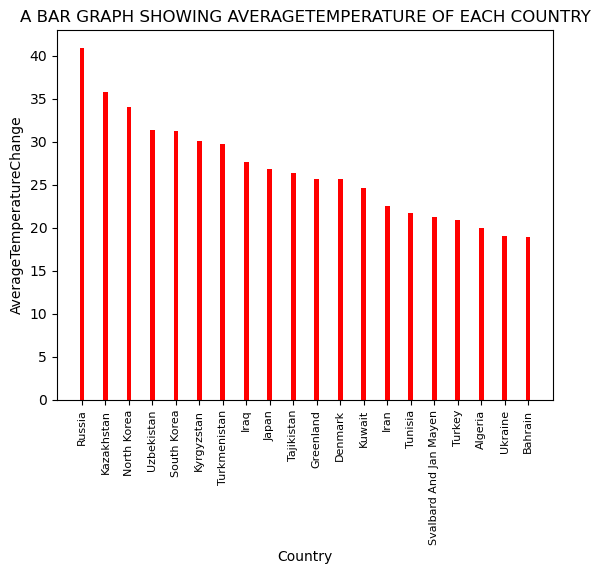

In [26]:
# Generating bar plot
plt.bar(data3.index,data3['TemperatureChange'],width=0.2,color='red')
plt.xlabel('Country')
plt.ylabel('AverageTemperatureChange')
plt.xticks(rotation = 90, fontsize=8)
plt.title('A BAR GRAPH SHOWING AVERAGETEMPERATURE OF EACH COUNTRY')
plt.show

### Overall Tendencies

There are a few ways in which we could determine the overall tendencies in the global surface temperature - we could analyze the temperature change per country or we could observe the change in the average global temperature. Let's look at both cases.

<function matplotlib.pyplot.show(close=None, block=None)>

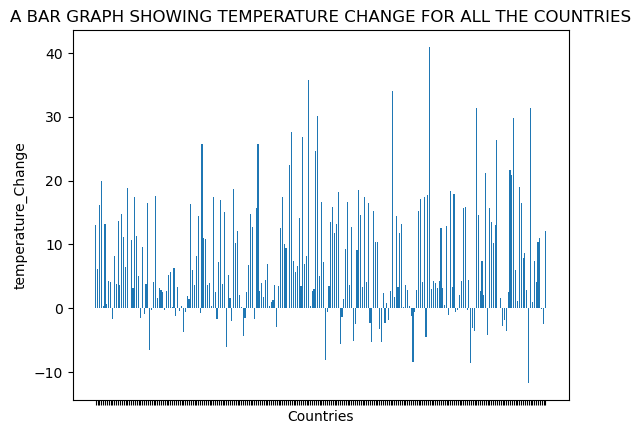

In [35]:
# Plot the bar graph for all countries
plt.bar(data3.index,data3['TemperatureChange'],width=0.6)
plt.xlabel('Countries')
plt.ylabel('temperature_Change')
plt.xticks(visible=False ,rotation=90)
plt.title('A BAR GRAPH SHOWING TEMPERATURE CHANGE FOR ALL THE COUNTRIES')
plt.show

In [ ]:
# Extract the average world temperature throughout the years
data4 = df1.groupby(['dt']).mean()
data4
# Plot the extracted data
plt.plot(data4.index,np.array(data4['AverageTemperature']))
plt.xlabel('Dates ')
plt.ylabel('Average Global Temperature')
plt.xticks(visible=False)
plt.show()


: 